In [1]:
import os

os.chdir("/content/drive/MyDrive/Proyecto BI 2023")

In [2]:
!ls

 apriori_dmc.ipynb
 clustering_distritos.ipynb
 clusters_distritos.xlsx
 Equipo_retail_1_clustering_and_MBA.pptx
 Equipo_retail_1_clustering_and_MBA_presentación.pdf
 output.xlsx
'PEA - ETL-CUBO.rar'
'proyecto BI - data - entregable v2.1.xlsx'
'proyecto BI - data - entregable v2.2.xlsx'
'proyecto BI - data - entregable v2.3.xlsx'
'proyecto BI - data - entregable.xlsx'
'proyecto BI.xlsx'
'Proyecto final - PEA BI Avanced.pbix'
 Proyecto_retail_1_clustering_and_MBA.ipynb
 Proyecto_retail_1_clustering_and_MBA_script.pdf
 rules_cluster_0.xlsx
 rules_cluster_1.xlsx
 rules_cluster_2.xlsx
 Untitled0.ipynb


# LIBRERIAS

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt


# guia

5 pasos
https://medium.com/@evgen.ryzhkov/5-stages-of-data-preprocessing-for-k-means-clustering-b755426f9932

transformaciones
https://s3.amazonaws.com/assets.datacamp.com/production/course_10628/slides/chapter3.pdf

tipo de clustering

https://realpython.com/k-means-clustering-python/

https://crunchingthedata.com/when-to-use-gaussian-mixture-models/

kmeans vs gaussian

https://www.sciencedirect.com/science/article/pii/S1877050920309820#:~:text=K%2DMeans%20is%20a%20simple,patterns%20within%20the%20data%20set.

# CODIGO

In [16]:
df = pd.read_excel( 'proyecto BI - data - entregable v2.2.xlsx' , sheet_name= 'BD x distrito' , skiprows=1 )

In [17]:
df.head(3)

,Distrito,soles,peso,Nro clientes,Nro trx,Nro Clientes -mes,venta anual x cliente,venta mensual x cliente,venta x transacción,peso anual x cliente,peso mensual x cliente,peso x transacción,precio prom x ton,mix_categorías prom mensual x cliente,Unnamed: 14
0,LIMA,3.416390e+06,592516.855,274,13674,4172,12468.576946,818.885447,249.845699,1049.022827,71.581872,28.116599,5.765895,4.738255,5.765895
1,SAN JUAN DE LURIGANC,2.360310e+06,464250.956,391,16472,7086,6036.597557,333.094785,143.292232,2162.470274,142.022257,43.331641,5.084124,3.715354,5.084124
2,LA VICTORIA,2.032418e+06,375214.360,151,7434,2266,13459.721261,896.918760,273.394930,705.620117,66.094908,28.667671,5.416685,4.804060,5.416685


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Distrito                               44 non-null     object 
 1   soles                                  44 non-null     float64
 2   peso                                   44 non-null     float64
 3   Nro clientes                           44 non-null     int64  
 4   Nro trx                                44 non-null     int64  
 5   Nro Clientes -mes                      44 non-null     int64  
 6   venta anual x cliente                  44 non-null     float64
 7   venta mensual x cliente                44 non-null     float64
 8   venta x transacción                    44 non-null     float64
 9   peso anual x cliente                   44 non-null     float64
 10  peso mensual x cliente                 44 non-null     float64
 11  peso x t

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
soles,44.0,536528.694109,675468.140632,7364.304000,119888.500800,394765.411200,667842.019200,3.416390e+06
peso,44.0,97742.114045,123646.005154,1336.771000,20562.389500,66028.653000,111509.081000,5.925169e+05
Nro clientes,44.0,71.522727,80.410137,1.000000,19.500000,50.000000,80.250000,3.910000e+02
Nro trx,44.0,2741.136364,3434.910944,42.000000,675.750000,1670.500000,3292.500000,1.647200e+04
Nro Clientes -mes,44.0,1057.772727,1313.461110,24.000000,270.750000,741.500000,1310.000000,7.086000e+03
venta anual x cliente,44.0,8516.183869,9354.287919,1472.860800,4602.996336,6356.214606,9402.533096,6.225780e+04
venta mensual x cliente,44.0,536.959765,401.186806,129.300884,316.843919,464.544155,599.900501,2.594075e+03
venta x transacción,44.0,220.335862,206.872546,64.324263,139.665834,188.850822,247.423768,1.482329e+03
peso anual x cliente,44.0,1429.663819,1235.179004,267.354200,778.443758,1196.123304,1714.642699,8.014678e+03
peso mensual x cliente,44.0,92.398801,54.178378,24.221408,60.639218,83.835827,106.147009,3.339449e+02


In [20]:
#sns.pairplot(df)
#plt.show()

In [21]:
# primera limpieza de variables

df_0 = df[['Distrito','Nro Clientes -mes', 'venta mensual x cliente', 'venta x transacción',
           'peso x transacción', 'precio prom x ton', 'mix_categorías prom mensual x cliente']].copy()

## high correlated variables

In [22]:
# https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_nums = df_0.select_dtypes(include=numerics)

In [23]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Nro Clientes -mes                      44 non-null     int64  
 1   venta mensual x cliente                44 non-null     float64
 2   venta x transacción                    44 non-null     float64
 3   peso x transacción                     44 non-null     float64
 4   precio prom x ton                      44 non-null     float64
 5   mix_categorías prom mensual x cliente  44 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.2 KB


In [24]:
df_nums.head(3)

,Nro Clientes -mes,venta mensual x cliente,venta x transacción,peso x transacción,precio prom x ton,mix_categorías prom mensual x cliente
0,4172,818.885447,249.845699,28.116599,5.765895,4.738255
1,7086,333.094785,143.292232,43.331641,5.084124,3.715354
2,2266,896.918760,273.394930,28.667671,5.416685,4.804060


<ipython-input-25-ce128553b2d3>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_nums.corr(), dtype=np.bool))


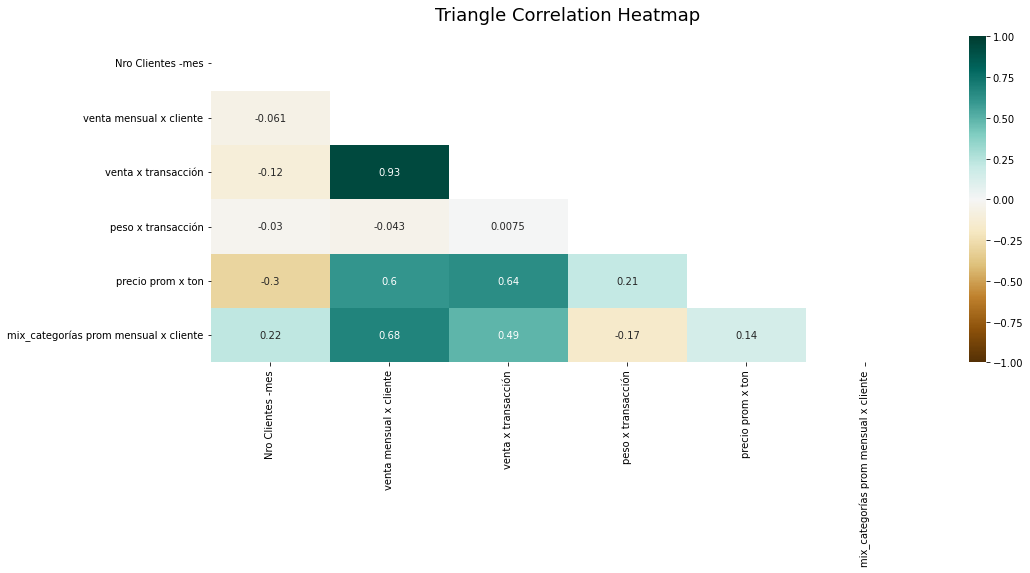

In [25]:
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
# correlation heatmap

plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_nums.corr(), dtype=np.bool))

heatmap = sns.heatmap(df_nums.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [26]:
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

"""
print("Correlation Matrix")
print(df_nums.corr())
print()
"""

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


## comprender generacion de variables


saber significado de columnas ayuda a la limpieza y generacion de nuevas variables

In [27]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df_nums, 10))

Top Absolute Correlations
venta mensual x cliente  venta x transacción                      0.931676
                         mix_categorías prom mensual x cliente    0.676319
venta x transacción      precio prom x ton                        0.635026
venta mensual x cliente  precio prom x ton                        0.604337
venta x transacción      mix_categorías prom mensual x cliente    0.488392
Nro Clientes -mes        precio prom x ton                        0.301188
                         mix_categorías prom mensual x cliente    0.223525
peso x transacción       precio prom x ton                        0.207092
                         mix_categorías prom mensual x cliente    0.170339
precio prom x ton        mix_categorías prom mensual x cliente    0.140655
dtype: float64


In [28]:
# CREACION DE VARIABLES - FEATURE ENGINEERING

#df_nums['ticket'] = df_nums['soles'] / df_nums['Nro trx']


In [30]:
columnas_eliminar = [ 'venta mensual x cliente' ]

df2 = df_nums.drop(columnas_eliminar , axis=1)

In [ ]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df2, 10))

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Nro Clientes -mes                      44 non-null     int64  
 1   venta x transacción                    44 non-null     float64
 2   peso x transacción                     44 non-null     float64
 3   precio prom x ton                      44 non-null     float64
 4   mix_categorías prom mensual x cliente  44 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.8 KB


In [ ]:
sns.pairplot(df2)
plt.show()

# pre processing

In [33]:
# https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering
# https://www.kaggle.com/code/hellbuoy/online-retail-k-means-hierarchical-clustering

# PASOS:
# primero tratar outliers
# luego scaling


In [34]:
# https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor



## outliers

In [35]:

#https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

# skewed data

def iqr_capping(df, columns):
  ''' 
  columns (list)
  '''
  df2 = df.copy() # hacemos que el df original no se sobreescriba

  for i in columns:
    percentile25 = df2[i].quantile(0.25)
    percentile75 = df2[i].quantile(0.75)

    iqr = percentile75 - percentile25

    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df2[i] = np.where( df2[i] > upper_limit, upper_limit,
              np.where( df2[i] < lower_limit, lower_limit,
                     df2[i])
            )
    
  return df2


# normal distribution data

def std_capping(df, columns):
  ''' 
  columns (list)
  '''
  df2 = df.copy() # hacemos que el df original no se sobreescriba

  for i in columns:

    upper_limit = df2[i].mean() + 3*df2[i].std()
    lower_limit = df2[i].mean() - 3*df2[i].std()

    df2[i] = np.where( df2[i] > upper_limit, upper_limit,
              np.where( df2[i] < lower_limit, lower_limit,
                     df2[i])
            )
    
  return df2

In [36]:
# apply capping outliers

df3 = iqr_capping(df2 , ['Nro Clientes -mes', 'venta x transacción', 'peso x transacción'])

df3 = std_capping(df3 , ['precio prom x ton', 'mix_categorías prom mensual x cliente'])

<ipython-input-37-36b37704f464>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Nro Clientes -mes'])   # sns.displot(df2['venta anual x cliente'])
<ipython-input-37-36b37704f464>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['Nro Clientes -mes'])


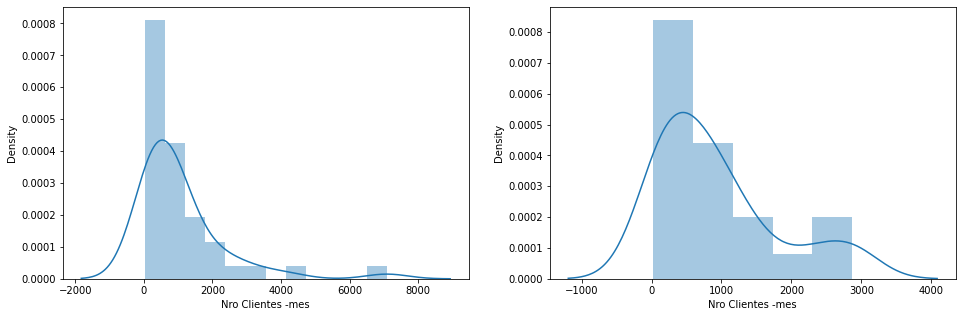

In [37]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(df2['Nro Clientes -mes'])   # sns.displot(df2['venta anual x cliente'])
plt.subplot(1,2,2)
sns.distplot(df3['Nro Clientes -mes'])
plt.show()


<ipython-input-38-c07e65e8b79a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[i])


Nro Clientes -mes


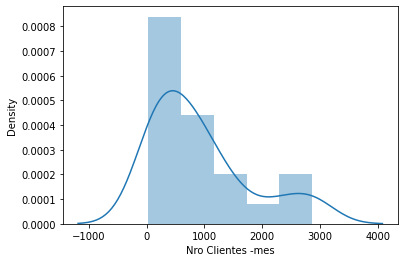

<ipython-input-38-c07e65e8b79a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[i])


venta x transacción


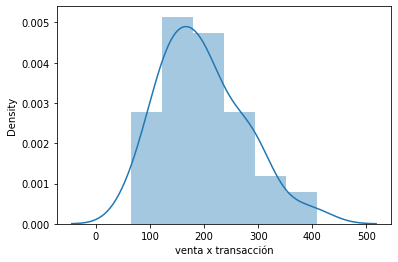

<ipython-input-38-c07e65e8b79a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[i])


peso x transacción


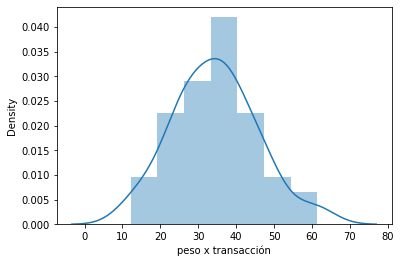

<ipython-input-38-c07e65e8b79a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[i])


precio prom x ton


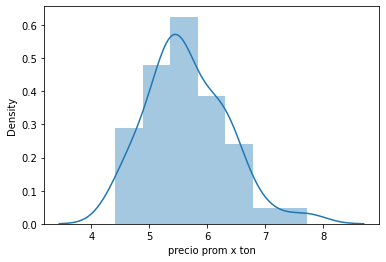

<ipython-input-38-c07e65e8b79a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[i])


mix_categorías prom mensual x cliente


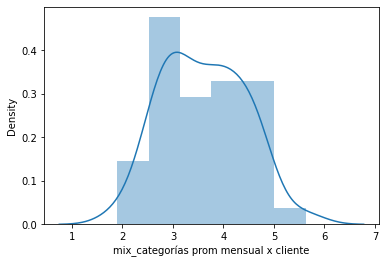

In [38]:
for i in list(df3.columns):
  sns.distplot(df3[i])
  print(i)
  plt.show()


<ipython-input-39-2a0e8fe3d807>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(frequency_log)


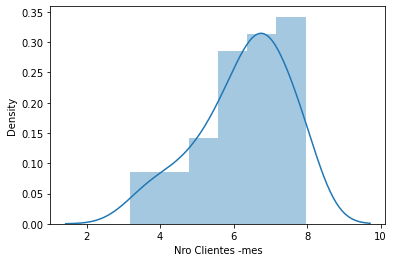

In [39]:
# https://s3.amazonaws.com/assets.datacamp.com/production/course_10628/slides/chapter3.pdf

# prueba -> cambiar distribucion skewed to normal

frequency_log = np.log(df3['Nro Clientes -mes'])
sns.distplot(frequency_log)
plt.show()

<Axes: xlabel='Nro Clientes -mes'>

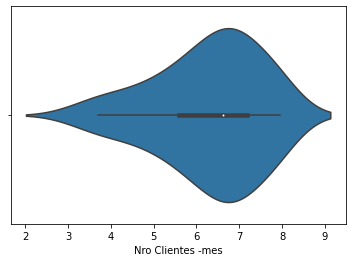

In [40]:

sns.violinplot(x= frequency_log)

In [41]:
# PRUEBA: pasar NRO CLIENTES A rangos 
# CONTRA: se vuelve variable categorica, por lo que no todos los modelos de clustering soportan mixed data


In [42]:
# https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

# scale -> standardize para que todas las variables tengan misma varianza (asunciones de modelos como K MEANS o gaussian)

from sklearn.preprocessing import StandardScaler

# standardization 
scaled_features = StandardScaler().fit_transform(df3.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df3.index, columns=df3.columns)

scaled_features_df.head(3)

,Nro Clientes -mes,venta x transacción,peso x transacción,precio prom x ton,mix_categorías prom mensual x cliente
0,2.283412,0.705220,-0.576058,0.165505,1.400197
1,2.283412,-0.688851,0.817153,-0.836580,0.134548
2,1.576444,1.013322,-0.525597,-0.347774,1.481618


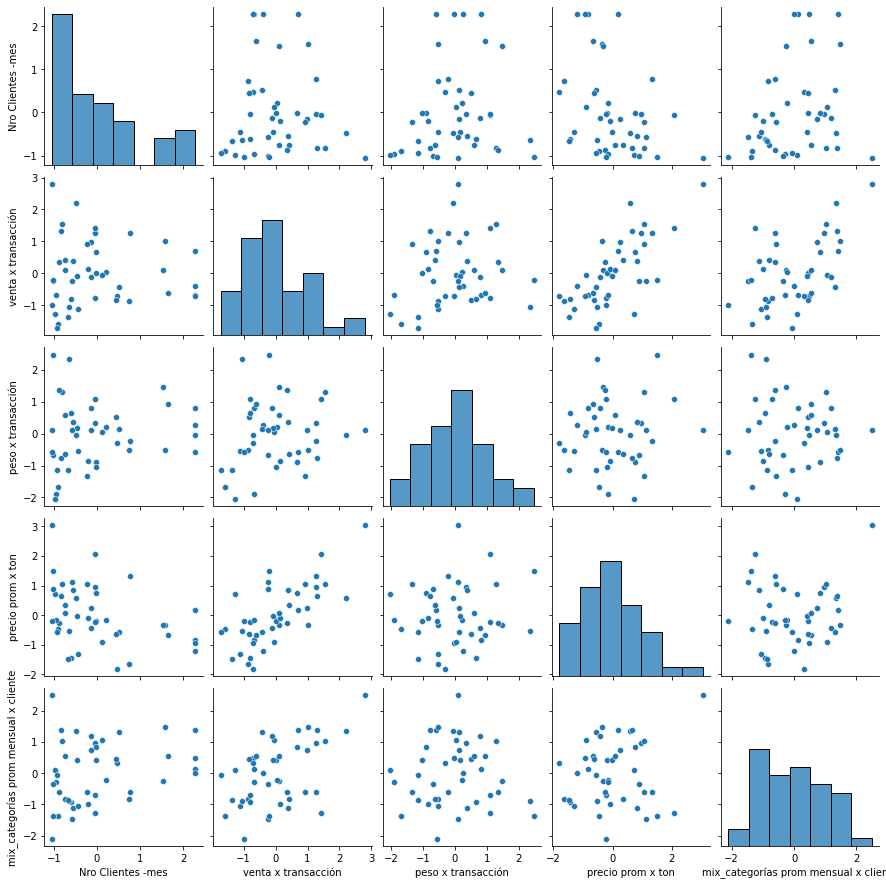

In [43]:
sns.pairplot(scaled_features_df)

In [44]:
# cambiar distribuciones a normal ( k means or gaussian)

# cluster technique

buena info:
https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b

clustering with mixed data
https://www.kaggle.com/discussions/general/19741

" the best way to carry out clustering on the dataset is to create principal components of the dataset and use the principal component scores as input into the clustering."

https://towardsdatascience.com/clustering-on-numerical-and-categorical-features-6e0ebcf1cbad



clustering categorical data
https://www.kaggle.com/code/halflingwizard/clustering-categorical-data-using-gower-distance



In [ ]:
# RECORDAR !!!
# python gaussian clustering no admite variables categoricas

In [ ]:
# https://www.kaggle.com/code/hellbuoy/online-retail-k-means-hierarchical-clustering

# https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

# agglomerative clustering with different metricc
# hierarchical clustering python categorical data



## Hierarchical clustering - AgglomerativeClustering 

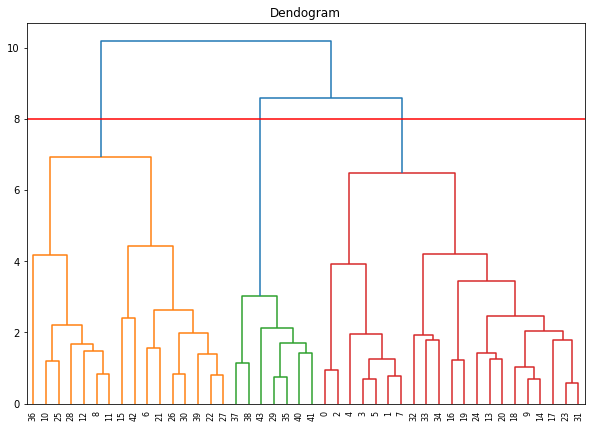

In [45]:

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendogram")
clusters = shc.linkage(scaled_features_df, 
            method='ward', 
            metric="euclidean")

shc.dendrogram(clusters)
plt.axhline( y = 8,
            color = 'r', linestyle = '-')

In [46]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

def silhouette_score_graph(df, ini, end, x_axis, y_axis):

  for n_clusters in range(ini, end+1):
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)
  
      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(df) + (n_clusters) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 10 for reproducibility.
      
      clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')

      cluster_labels = clusterer.fit_predict(df)

      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(df, cluster_labels)

      print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples( df, cluster_labels)

      y_lower = 10

      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = \
              sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i+1) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral((cluster_labels.astype(float)) / n_clusters)

      ax2.scatter(df[x_axis], df[y_axis], marker='.', s=30, lw=0, alpha=0.7,
                  c=colors, edgecolor='k')

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")

      plt.suptitle(("Silhouette analysis for clustering on  data "
                    "with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')

  plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.22614663215168856
For n_clusters = 4 The average silhouette_score is : 0.2415019907008274
For n_clusters = 5 The average silhouette_score is : 0.2589025527625713


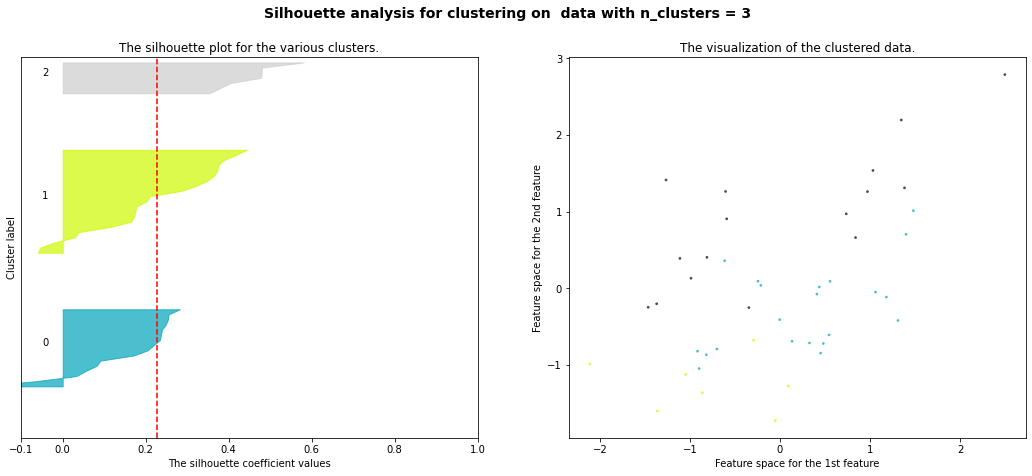

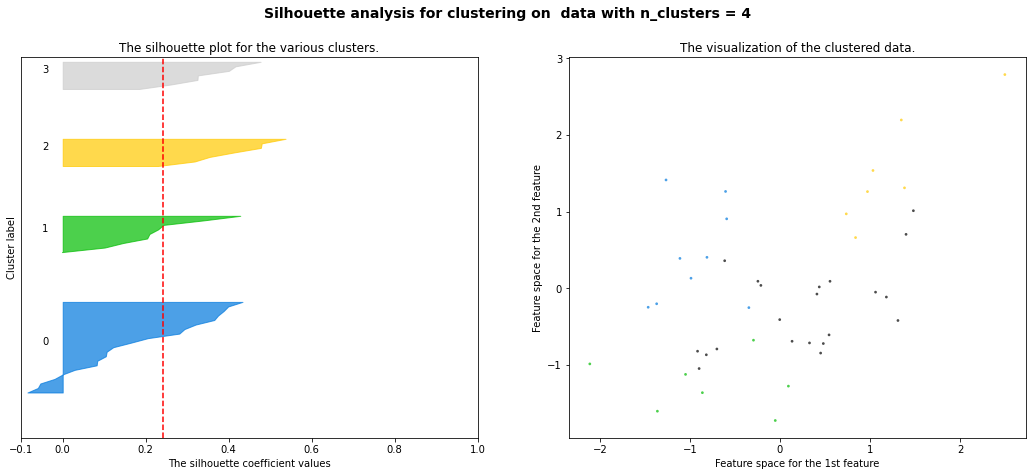

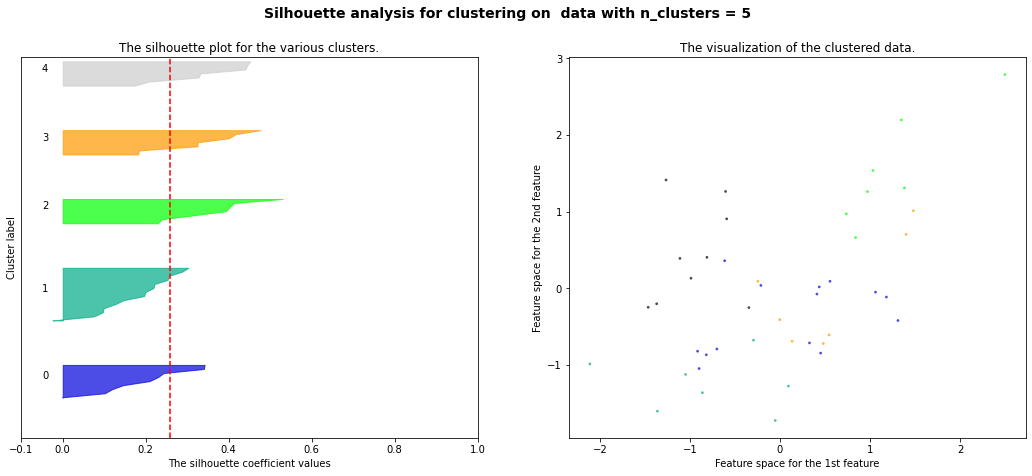

In [47]:
# https://rstudio-pubs-static.s3.amazonaws.com/284508_1faa54c2fb684ad689eccc0bcaa3b528.html#:~:text=Silhouette%20Coefficient,-The%20silhouette%20coefficient&text=N%E2%88%921)%20and%20plotted.,ideal%20to%20validate%20hierarchical%20clustering.

# https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6


silhouette_score_graph(scaled_features_df, ini= 3, end= 5,
                       x_axis = 'mix_categorías prom mensual x cliente',
                       y_axis = 'venta x transacción')



In [48]:


from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters = 3,
                                           affinity='euclidean', 
                                           linkage='ward')

clustering_model.fit(scaled_features_df)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

Text(0.5, 1.0, 'Labeled Data')

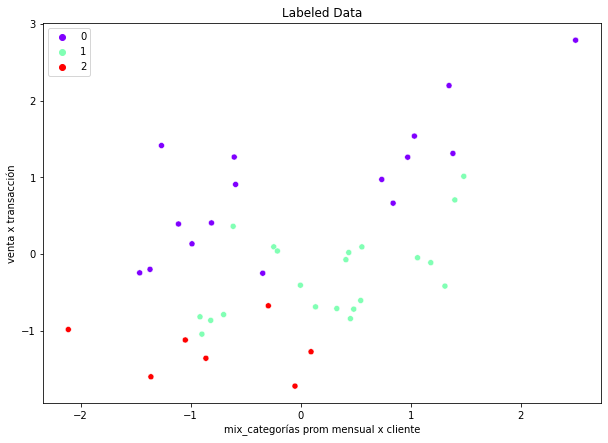

In [49]:

data_labels = clustering_model.labels_

plt.figure(figsize=(10, 7))

sns.scatterplot(x = 'mix_categorías prom mensual x cliente', 
                y = 'venta x transacción', 
                data = scaled_features_df, 
                hue= data_labels,
                palette= 'rainbow').set_title('Labeled Data')

In [50]:
# pegar valores

df4 = df3.copy()

df4['clusters'] = data_labels

df4['Distrito'] = df_0['Distrito']


In [51]:
# concatenate side by side

#df_clust = pd.concat([scaled_features_df, df4], axis=1)

In [52]:
df4.head(3)

,Nro Clientes -mes,venta x transacción,peso x transacción,precio prom x ton,mix_categorías prom mensual x cliente,clusters,Distrito
0,2868.875,249.845699,28.116599,5.765895,4.738255,1,LIMA
1,2868.875,143.292232,43.331641,5.084124,3.715354,1,SAN JUAN DE LURIGANC
2,2266.000,273.394930,28.667671,5.416685,4.804060,1,LA VICTORIA


In [53]:
df4['clusters'].value_counts()

1    21
0    16
2     7
Name: clusters, dtype: int64

### profiling

In [61]:
df_clust_test = df4.groupby(['clusters'])['Nro Clientes -mes', 'venta x transacción', 'peso x transacción', 'precio prom x ton', 'mix_categorías prom mensual x cliente'].mean()

df_clust_test

<ipython-input-61-a0177291896e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_clust_test = df4.groupby(['clusters'])['Nro Clientes -mes', 'venta x transacción', 'peso x transacción', 'precio prom x ton', 'mix_categorías prom mensual x cliente'].mean()


,Nro Clientes -mes,venta x transacción,peso x transacción,precio prom x ton,mix_categorías prom mensual x cliente
clusters,,,,,
0,549.375000,265.462149,34.770419,6.349858,3.619772
1,1445.642857,174.770202,38.807608,5.234937,3.813459
2,200.714286,100.563037,20.378515,5.316216,2.955991


<Axes: xlabel='clusters', ylabel='venta x transacción'>

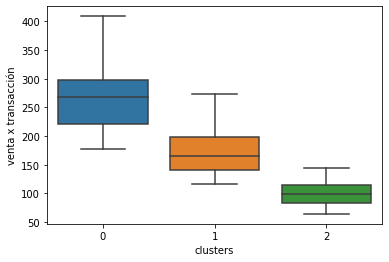

In [54]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='clusters', y='venta x transacción', data= df4)

Nro Clientes -mes


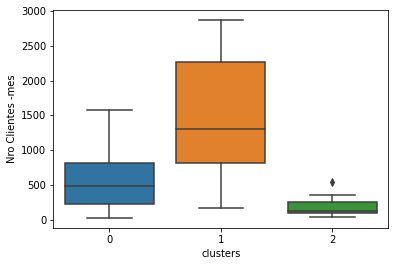

venta x transacción


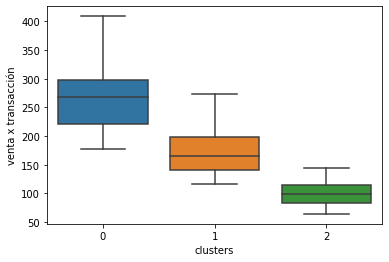

peso x transacción


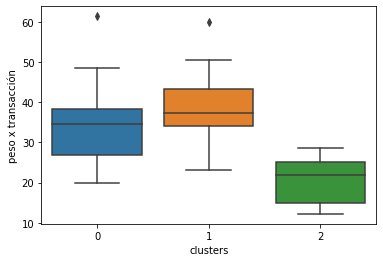

precio prom x ton


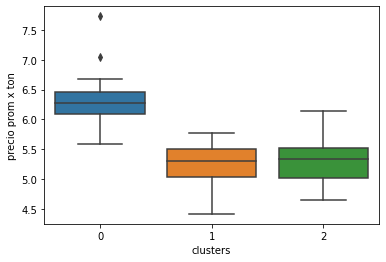

mix_categorías prom mensual x cliente


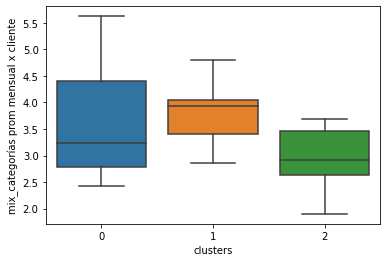

In [55]:
variables = ['Nro Clientes -mes', 'venta x transacción', 'peso x transacción', 'precio prom x ton', 'mix_categorías prom mensual x cliente']

for i in variables:
  sns.boxplot(x='clusters', y= df4[i], data= df4)
  print(i)
  plt.show()

In [56]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
# https://www.analyticsvidhya.com/blog/2021/10/how-to-build-a-treemap-in-3-ways-using-python/

import squarify

sns.set_style(style="whitegrid") # set seaborn plot style

df4['values'] = 5

sizes= df4["values"].values # proportions of the categories

label= df4["Distrito"]


In [58]:
def colors_clusters(x):

  if x == 0:
    a = "Red"
  elif x == 1:
    a = "Blue"
  elif x == 2:
    a = "Yellow"
  else:
    a = "Green"

  return a


df4['colors'] = df4["clusters"].apply(lambda x: colors_clusters(x))

colors = df4['colors']

In [59]:
colors[:5]

0    Blue
1    Blue
2    Blue
3    Blue
4    Blue
Name: colors, dtype: object

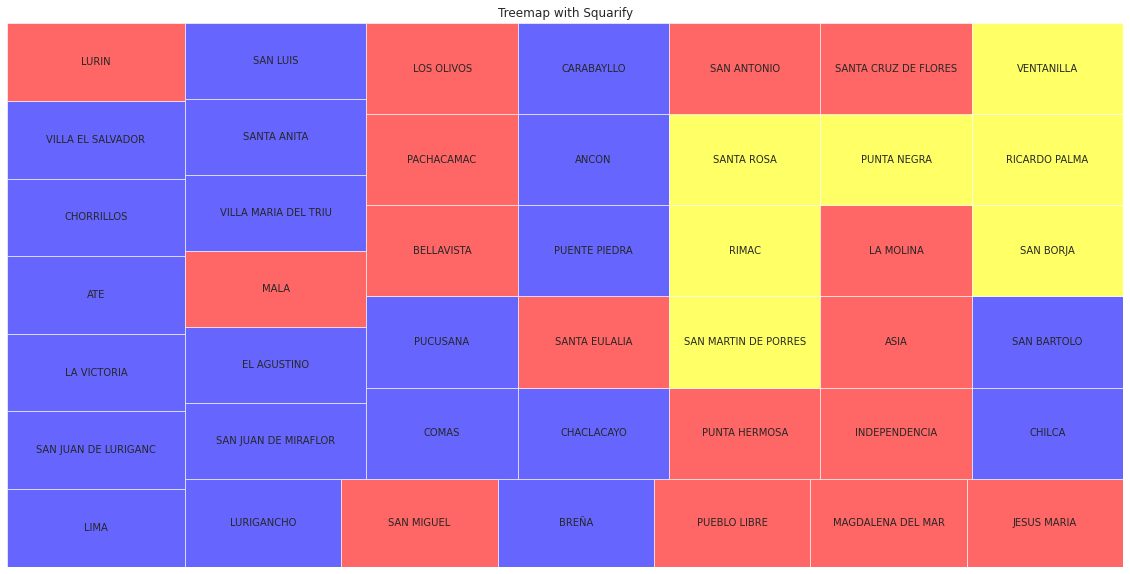

In [60]:
plt.figure(figsize=(20, 10))

squarify.plot(sizes=sizes, label=label, alpha=0.6, color = colors ).set(title='Treemap with Squarify')

plt.axis('off')
plt.show()

## gaussian

In [ ]:
# https://www.cienciadedatos.net/documentos/py23-deteccion-anomalias-gmm-python.html

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
#from mat4py import loadmat
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

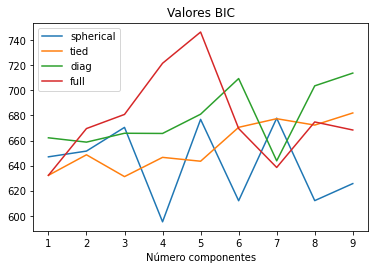

In [ ]:
# Tunning del modelo GMM
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

n_components = range(1, 10)
covariance_types = ['spherical', 'tied', 'diag', 'full']

for covariance_type in covariance_types:
    valores_bic = []
    
    for i in n_components:
        modelo = GaussianMixture(n_components=i, covariance_type=covariance_type)
        modelo = modelo.fit(scaled_features_df)
        valores_bic.append(modelo.bic(scaled_features_df))
        
    ax.plot(n_components, valores_bic, label=covariance_type)
        
ax.set_title("Valores BIC")
ax.set_xlabel("Número componentes")
ax.legend();

In [ ]:
modelo_gmm_1 = GaussianMixture(
                n_components    = 4,
                covariance_type = 'spherical',
                random_state    = 123
             )

modelo_gmm_1.fit(X= scaled_features_df)

GaussianMixture(covariance_type='spherical', n_components=4, random_state=123)

Text(0.5, 1.0, 'Labeled Data')

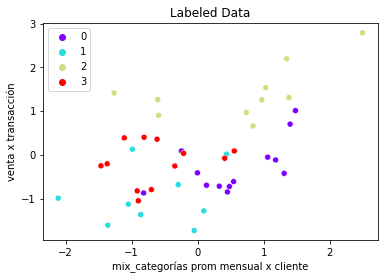

In [ ]:
# https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/

# predictions from gmm
gmm_labels_1 = modelo_gmm_1.predict(scaled_features_df)

sns.scatterplot(x = 'mix_categorías prom mensual x cliente', 
                y = 'venta x transacción', 
                data = scaled_features_df, 
                hue= gmm_labels_1,
                palette= 'rainbow').set_title('Labeled Data')

Text(0.5, 1.0, 'Labeled Data')

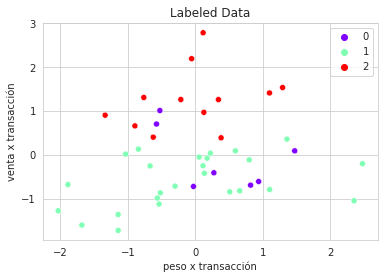

In [ ]:
modelo_gmm_2 = GaussianMixture(
                n_components    = 3,
                covariance_type = 'tied',
                random_state    = 123
             )

modelo_gmm_2.fit(X= scaled_features_df)

# predictions from gmm
gmm_labels_2 = modelo_gmm_2.predict(scaled_features_df)

sns.scatterplot(x = 'peso x transacción', 
                y = 'venta x transacción', 
                data = scaled_features_df, 
                hue= gmm_labels_2,
                palette= 'rainbow').set_title('Labeled Data')

